In [81]:
'''
Breaks the large raw tweet data file into manageable portions

'''


import pandas as pd

#setting file siz;e to 10000 tweets
chunk_size = 10000
batch_no = 1

print("Beginning to parse tweets...")

#Adjust path name per file, this is the small test file I am running currently
for chunk in pd.read_csv("../public/Tweets/test_dataset.csv", chunksize = chunk_size, error_bad_lines=False):
        chunk.to_csv("covid_data" + str(batch_no) + ".csv", index = False)
        batch_no += 1

print("Finished parsing tweets.")

Beginning to parse tweets...


FileNotFoundError: [Errno 2] File b'../public/Tweets/test_dataset.csv' does not exist: b'../public/Tweets/test_dataset.csv'

In [ ]:
!pip install gensim
!pip install nltk
!pip install numpy
!pip install tqdm
!pip install tqdm.notebook
!pip install csv
!pip install glob
!pip install pyLDAvis
!pip install spacy
!pip install matplotlib
!pip install logging
!pip install warnings
!pip install wordcloud

In [18]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from tqdm import tqdm
from tqdm.notebook import tqdm as nbtqdm
import csv
import glob
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import spacy
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in ["https", "rtrt"] and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [20]:
'''
 creates corpus for topic modelling 
'''

#Correct Dates start at file 700

sentimentDict = {}
documents = []
path = "./covid_data*"

print("Beginning to create corpus...")
#I put the smaller chunked tweet files in to a directory called revisedCovidData
for filename in tqdm(glob.glob(path)):
    #Iterate through this directory, reading each file
    with open(filename, 'r', encoding="utf-8") as rawTweets:
        #open as CSV iterator
        readCSV = csv.reader(rawTweets)
        next(readCSV)
        #Iterate through individual tweets
        for line in readCSV:
            #if line[9] != "Null" or "us_state":
                #calls text of each tweet as a TextBlob object
            text = line[1]
                #line[9] = state; if this state is already in the dictionary, the sentiment gets averaged
            documents.append(text)
    break
        
        
print(len(documents))
print(documents[-21])



Beginning to create corpus...


  0%|          | 0/4177 [00:00<?, ?it/s]


10000
RTRT @DailyExpress_MYJUST IN: Wuhan-KK-Wuhan flights have been suspended until Jan 28, @cliew30 has announced.   @KKCity @SabahInfo @SABAHtwt   #coronavirus #CoronavirusOutbreak #coronaviruses https://t.co/tevtKbxCzE


In [21]:
doc_sample = documents[4310]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['RTRT', '@LiYuan6"I\'ve', 'experienced', 'a', 'lot', "&I've", 'never', 'felt', 'scared,most', 'of', 'these', 'are', 'controllable,"', 'said', 'Dr.', 'Guan', 'Yi,an', 'expert', 'in', 'infectious', 'disease,', 'citing', 'previous', 'battles', 'with', 'SARS,', 'avian', 'influenza', 'and', 'other', 'outbreaks.', '"But', 'this', 'time', "I'm", 'scared."', 'via', '@austinramzy', '', 'https://t.co/CJPRGIcj1b']


 tokenized and lemmatized document: 
['liyuan', 'experi', 'felt', 'scar', 'control', 'say', 'guan', 'expert', 'infecti', 'diseas', 'cite', 'previous', 'battl', 'sar', 'avian', 'influenza', 'outbreak', 'time', 'scar', 'austinramzi', 'cjprgicj']


In [22]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in ["rtrt", "https"] and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [23]:
doc_sample = documents[370]
print('original document: ')
words = []
for word in tqdm(doc_sample.split(' ')):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 


100%|██████████| 45/45 [00:00<00:00, 11278.38it/s]


['RTRT', '@ABCWashington', 'Gov.', 'Jay', 'Inslee', 'on', 'first', 'confirmed', 'case', 'of', 'coronavirus', 'reported', 'in', 'U.S.:', '"The', 'risk', 'is', 'low', 'to', 'residents', 'of', 'the', 'state', 'of', 'Washington."', '', '"This', 'is', 'certainly', 'not', 'a', 'moment', 'for', 'panic', 'or', 'high', 'anxiety.', 'It', 'is', 'a', 'moment', 'for', 'vigilance."', 'https://t.co/FsCRAdLtSR', 'https://t.co/ba26z2KHIb']


 tokenized and lemmatized document: 
['abcwashington', 'insle', 'confirm', 'case', 'coronavirus', 'report', 'risk', 'resid', 'state', 'washington', 'certain', 'moment', 'panic', 'high', 'anxieti', 'moment', 'vigil', 'fscradltsr', 'khib']


In [24]:
print("working")
from tqdm.notebook import tqdm as nbtqdm
from time import sleep
preprocessed_docs = []
print("processing the documents")
for tweet in nbtqdm(documents):
    thing = preprocess(tweet)
    preprocessed_docs.append(thing)
type(preprocessed_docs)
i = 0
for element in preprocessed_docs:
    i+=1
    print(preprocessed_docs)
    if i >= 10:
        break


working
processing the documents


[['crude', 'eurusd', 'near', 'month', 'low', 'nasdaq', 'push', 'time', 'high', 'global', 'risk', 'koronavirus', 'china', 'iran', 'tension', 'onlin', 'cours', 'sure', 'join', 'tonight', 'live', 'webinar', 'trade', 'floor'], ['novel', 'coronavirus', 'situat', 'summari', 'wuhan', 'china', 'ovjupg', 'cdcgov'], ['yrhamcdc', 'traumat', 'brain', 'injuri', 'concuss', 'fact', 'traumat', 'brain', 'injuri', 'major', 'caus', 'death', 'disabl', 'unit', 'state', 'relat', 'death', 'includ', 'death', 'children', 'hfel'], ['test', 'peopl', 'possibl', 'wuhan', 'virus', 'spokesperson', 'kristen', 'nordlund', 'say', 'laboratori', 'unit', 'state', 'test', 'virus', 'cnnbrk'], ['issu', 'warn', 'year', 'strand', 'especi', 'season', 'wors', 'peopl', 'vaccin', 'sure', 'seek', 'medic', 'attent', 'stay', 'away', 'public', 'place', 'start', 'feel', 'puni', 'kiddo', 'season'], ['kristin', 'accord', 'death', 'measl', 'decad', 'studi', 'report', 'whatarewedo', 'voteno', 'voteno', 'votenoa', 'voteno', 'mybodymychoic',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:

dictionary = gensim.corpora.Dictionary(preprocessed_docs)

count = 0
for k, v in nbtqdm(dictionary.iteritems()):
    print(k,v)

0 china
1 cours
2 crude
3 eurusd
4 floor
5 global
6 high
7 iran
8 join
9 koronavirus
10 live
11 low
12 month
13 nasdaq
14 near
15 onlin
16 push
17 risk
18 sure
19 tension
20 time
21 tonight
22 trade
23 webinar
24 cdcgov
25 coronavirus
26 novel
27 ovjupg
28 situat
29 summari
30 wuhan
31 brain
32 caus
33 children
34 concuss
35 death
36 disabl
37 fact
38 hfel
39 includ
40 injuri
41 major
42 relat
43 state
44 traumat
45 unit
46 yrhamcdc
47 cnnbrk
48 kristen
49 laboratori
50 nordlund
51 peopl
52 possibl
53 say
54 spokesperson
55 test
56 virus
57 attent
58 away
59 especi
60 feel
61 issu
62 kiddo
63 medic
64 place
65 public
66 puni
67 season
68 seek
69 start
70 stay
71 strand
72 vaccin
73 warn
74 wors
75 year
76 accord
77 decad
78 kristin
79 measl
80 mybodymychoic
81 report
82 riseup
83 studi
84 thisisjersey
85 vaccineinjuri
86 voteno
87 votenoa
88 wakeup
89 whatarewedo
90 airport
91 anonnonsens
92 flight
93 rout
94 screen
95 sirahx
96 sourc
97 britain
98 communic
99 eastern
100 engag
101 feb

736 mortal
737 oghxfrq
738 white
739 worst
740 cancer
741 cervic
742 check
743 dhigmm
744 employeehealth
745 lower
746 option
747 regular
748 barter
749 cattl
750 cdc_pulpitth
751 economi
752 ensu
753 hacker
754 hide
755 hijinx
756 hill
757 posit
758 sticker
759 abcwashington
760 anxieti
761 certain
762 fscradltsr
763 insle
764 khib
765 moment
766 vigil
767 bacteria
768 cdc_tbdyk
769 condit
770 exist
771 latent
772 mmkds
773 xvltsehzsb
774 adqluuitck
775 dedic
776 epidalertth
777 page
778 pictur
779 relev
780 adult
781 aren
782 booster
783 carlyweek
784 immun
785 infer
786 jaketapp
787 kovxbo
788 lmvorm
789 nicoryanj
790 pertussi
791 rang
792 ten
793 thousand
794 wane
795 drtomfriedenw
796 order
797 prepar
798 question
799 rsktx
800 yesterday
801 bigshitxtalk
802 libxrtymichxllx
803 udhfbbul
804 age
805 child
806 doctor
807 hpvvaccin
808 lead
809 recommend
810 type
811 wdzxxnvsdl
812 xeuldm
813 aander
814 adcock
815 angelsg
816 better
817 brookem_feldman
818 consult
819 dawsoninga
820 

1383 refer
1384 word
1385 disappear
1386 fake
1387 mass
1388 night
1389 detect
1390 americaninquir
1391 arieljon
1392 chickenpox
1393 fdsd
1394 yashar
1395 bustn_air
1396 cardiac
1397 graphic
1398 larg
1399 nsaid
1400 obfusc
1401 ravensspirit
1402 sudden
1403 cloh
1404 idyo
1405 construct
1406 august
1407 complet
1408 curious
1409 eye
1410 narrat
1411 warriormama
1412 hepat
1413 lcwcb
1414 focus
1415 hamstr
1416 profil
1417 throw
1418 flushot
1419 indic
1420 influenza
1421 negat
1422 odd
1423 propaganda
1424 rkze
1425 unvaccin
1426 duuokrvi
1427 wtpuyf
1428 conclud
1429 hopkin
1430 john
1431 opioid
1432 overdos
1433 suicid
1434 tcqj
1435 uoedn
1436 eymiwj
1437 repdebdingellw
1438 safeguard
1439 aonsg
1440 cdcgovcdc
1441 clinician
1442 introduct
1443 owderk
1444 partner
1445 proactiv
1446 benefit
1447 extens
1448 licens
1449 outweigh
1450 sjvoizr
1451 childhood
1452 zatvzrpdhg
1453 djoufoa
1454 friday
1455 gibson
1456 lexmedctr
1457 lmcdpsoffic
1458 bildf
1459 jyt
1460 bing
1461 drink
1

2018 mrc_outbreak
2019 neil_ferguson
2020 plagu
2021 realiti
2022 shiroihamusan
2023 srileyidd
2024 the_mrc
2025 ywfzgawov
2026 gregkoblentzin
2027 elizabeth
2028 ezracheungtoto
2029 hospitalis
2030 queen
2031 standnewshk
2032 batsashimi
2033 borisjohnson
2034 catherinewest
2035 dinner
2036 dominicraab
2037 foreignoffic
2038 govuk
2039 heatherwheel
2040 hk_watch
2041 matthancock
2042 patel
2043 tariqahmadbt
2044 tomtugendhat
2045 ukhouseoflord
2046 ukparlia
2047 urlodgkc
2048 witham
2049 wuhanoutbreak
2050 disinfect
2051 jungelkdlt
2052 roxtonwip
2053 run
2054 whydoyouwip
2055 ecdc_fluread
2056 kqinyayd
2057 mgrdwcwa
2058 mlfgru
2059 riskassess
2060 davo
2061 imrankhanpti
2062 nhsuk
2063 nicecomm
2064 pakistan
2065 save
2066 audienc
2067 claud
2068 dakar
2069 institutpasteur
2070 manuguerra
2071 medilabsecur
2072 meet
2073 network
2074 nnjlxdrvci
2075 region
2076 regmeetingdakar
2077 seneg
2078 summar
2079 virolog
2080 bowl
2081 ixhswoen
2082 soup
2083 baric
2084 pferib
2085 ralph
2086

2690 consid
2691 corner
2692 hiawest
2693 kathycollett
2694 kcsteckel
2695 pif
2696 r_tinti
2697 ryannctweet
2698 taho
2699 tinarodwel
2700 confid
2701 drive
2702 efgph
2703 idea
2704 infrequ
2705 mansplain
2706 vers
2707 wall
2708 whet
2709 dvlbs
2710 foreign
2711 xvwi
2712 emporium
2713 epicent
2714 fare
2715 medical_xpress
2716 wepid
2717 anybodi
2718 bind
2719 complex
2720 conveni
2721 coverag
2722 draw
2723 fascism
2724 opposit
2725 abid
2726 argu
2727 convers
2728 owner
2729 septemb
2730 chicken
2731 eaknvc
2732 egg
2733 actiononsugar
2734 beverag
2735 calori
2736 curb
2737 obes
2738 sugar
2739 beer
2740 robin_
2741 authent
2742 digit
2743 inclus
2744 mcwhdatilj
2745 spiritu
2746 sport
2747 tribe
2748 cloudi
2749 crack
2750 damn
2751 fqcrnvmyi
2752 subway
2753 and_kellw
2754 aw
2755 danc
2756 desper
2757 tiktokdoc
2758 athensgastronon
2759 carb
2760 demonstr
2761 fatti
2762 fructos
2763 kpsknczwck
2764 liver
2765 pancrea
2766 pancreat
2767 belov
2768 cakes_iamla
2769 fashion
2770

3305 surgeon_gener
3306 chicago
3307 eqijvjh
3308 boot
3309 burgess
3310 michaelcburgess
3311 spend
3312 wkso
3313 georgia
3314 ojycznonpx
3315 self
3316 jessekirschabc
3317 ohar
3318 vdyhwgp
3319 pokrathform
3320 qrhxpd
3321 samstein
3322 noon
3323 rmah
3324 sandrasmithfox
3325 siegel
3326 cdcdirector
3327 eqfagp
3328 shingl
3329 shingrix
3330 uqzcwc
3331 qyyrbvnpoo
3332 rninflchina
3333 ialjxxlkc
3334 kitsapsun
3335 secretari
3336 wiesman
3337 firearm
3338 gorskon
3339 irat
3340 nut
3341 survey
3342 ieeqi
3343 uqlkwcxmgk
3344 baselin
3345 undertr
3346 untreat
3347 aberr
3348 barkismist
3349 bhupeshprusti
3350 brand
3351 classic
3352 holm
3353 nichol
3354 osler
3355 oslersweb
3356 pattern
3357 remediespodcast
3358 serolog
3359 shocker
3360 vifkeaymya
3361 mchooyah
3362 theme
3363 whiteraven
3364 wnuc
3365 zqnwmlophq
3366 againstcur
3367 allergi
3368 blue
3369 brzlccql
3370 cell
3371 deerbrian
3372 deriv
3373 drbrignal
3374 drpchouinard
3375 edalmayn
3376 fetal
3377 irrit
3378 kavvasak

6455 vbuzl
6456 asdhukuerc
6457 mail
6458 gureyjqnug
6459 worldnew
6460 andreawoo
6461 globeandmail
6462 ictawfggkq
6463 kellygr
6464 lcxjinhku
6465 lilkuo
6466 nvanderklipp
6467 scrap
6468 madmraket
6469 mrna
6470 qrpbvxe
6471 virul
6472 hbkyxwcgjw
6473 qauafzymxh
6474 gwnm
6475 xllfe
6476 dlyjbhymab
6477 intl
6478 rt_comwho
6479 nkaga
6480 rumour
6481 aleah
6482 bmzjf
6483 ehdabulonw
6484 ofoxofoxsom
6485 agreeabl
6486 ohet
6487 pfqn
6488 rboh
6489 tvauiweue
6490 bpwonq
6491 xqjxanz
6492 andylau
6493 bbcchines
6494 chinazivirus
6495 fydmkg
6496 wakix
6497 ewheaupxd
6498 lekrutj
6499 cnnijust
6500 wthqtf
6501 afzal
6502 gortonfollow
6503 mitig
6504 tlwxwmrgfo
6505 circumst
6506 shoutout
6507 tom_fowdyyou
6508 truli
6509 ericsputek
6510 instanewsalert
6511 dkunjli
6512 bias
6513 fearmong
6514 jane_c_huth
6515 necessarili
6516 axbwbzti
6517 czot
6518 thpa
6519 ecjw
6520 wccas
6521 yangon
6522 dieas
6523 planrathavit
6524 watermask
6525 gavincurnowwhi
6526 jrplctowz
6527 gcubg
6528 ducve

7068 distract
7069 yhrml
7070 mipdrv
7071 phe_ukto
7072 pynhmzmzf
7073 idvu
7074 nupu
7075 roach
7076 zxpv
7077 nfuzjv
7078 va_shiva
7079 ndcilw
7080 pitx
7081 rdcqp
7082 stevelaicna
7083 volum
7084 jitfaqb
7085 wuhanexit
7086 seattletimesa
7087 squkgeif
7088 asxbwq
7089 cdcfraud
7090 everybodi
7091 lotusoak
7092 sear
7093 thedoctor
7094 vexit
7095 carolsuefri
7096 drjonmark
7097 edsc_
7098 gentrywmd
7099 mqxrnugrei
7100 trishkavaagh
7101 aameranwar
7102 cdc_glasgow
7103 claraponsati
7104 extradit
7105 vilaweb_enful
7106 wvsbbudq
7107 aqgsyqkkyy
7108 g_combevap
7109 schoolnurs
7110 airforc
7111 altp
7112 defens
7113 dynam
7114 govcon
7115 intellig
7116 jam
7117 navi
7118 nowicki
7119 overse
7120 usaf
7121 vywz
7122 alaska
7123 itfybcjkcm
7124 npzvdjbyj
7125 drown
7126 jpvl
7127 tcatmpsi
7128 whistleblew
7129 ajxsbma
7130 fxwj
7131 hcps
7132 tdahf
7133 advers
7134 ldopqwacn
7135 agl
7136 blink
7137 gxzus
7138 insurgencygam
7139 montag
7140 cdcinjuryth
7141 leefotqz
7142 xihlbbbb
7143 ea

10089 bkrs
10090 lorenamejia
10091 deliber
10092 hkthisweek
10093 qzitydkgjq
10094 bamdoessci
10095 hvku
10096 snakeymama
10097 myblfkpirh
10098 paminordinnovel
10099 boss
10100 pilipina
10101 actorfheqi
10102 graduat
10103 ncpkydefjd
10104 ness
10105 sonsofafrika
10106 wrbbradio
10107 xkkwueqc
10108 ohmzvhdfhw
10109 bppqxlja
10110 ijznosyd
10111 qfsjccf
10112 microbiologist
10113 rant
10114 njabjahmv
10115 uzefpyssbt
10116 mixup
10117 concurr
10118 moraghamilton
10119 murdo_fras
10120 scottori
10121 lssluh
10122 pneumoniawuhan
10123 subject
10124 tfuia
10125 kamo
10126 nakaka
10127 postiv
10128 sczjygci
10129 arambautlatest
10130 distinct
10131 wriyqm
10132 abscbnnewstwo
10133 followlasglasg
10134 jidesanwoolu
10135 lasg
10136 lsmoh
10137 rag
10138 wqsdleuywb
10139 ysevcikth
10140 wholiv
10141 woyqk
10142 sumlokkeiwith
10143 heed
10144 marxlv
10145 mfa_chinath
10146 zyjbci
10147 abscbnnew
10148 jacquemanabat
10149 siynmdt
10150 btsarmi
10151 acceler
10152 drmikeryan
10153 mvankerkhov


10637 txopdc
10638 coti
10639 jose_eulogio
10640 pmarsupia
10641 raccon
10642 nuhl
10643 emilyrauhala
10644 didi
10645 hire
10646 epochtimesa
10647 sogbnp
10648 tqmebpaoay
10649 jklgxgapp
10650 heavili
10651 spsc
10652 teamminjii
10653 caronavirus
10654 domdyer
10655 ginachron
10656 judysal
10657 matthew_wright
10658 mice
10659 muratpompiduyou
10660 muschifuss
10661 oliviahusseyla
10662 peteregan
10663 qczmjhq
10664 sallyst
10665 scanmefortuk
10666 theagentmaddi
10667 tvkev
10668 awaiz
10669 chengdu
10670 mewgulf
10671 noelia
10672 stronger
10673 ucqjvhq
10674 iqkttkhqdv
10675 nkbkmxhfti
10676 seanxiao
10677 xiao
10678 xiaozhan
10679 xiaozhan_glob
10680 zhan
10681 got
10682 pep
10683 rampcapitalllc
10684 fres
10685 pwvg
10686 apolog
10687 chinaseri
10688 netizen
10689 recap
10690 breed
10691 dr_koko
10692 sidhantmea
10693 pprincessazal
10694 corornavirus
10695 eunl
10696 angl
10697 kvyz
10698 nsxqw
10699 gpseevxdxw
10700 joehoft
10701 hpvumf
10702 exploit
10703 microb
10704 zbpxyshgc
1

In [8]:
#filters out any token in 15 or fewer, more than half, and only the 100,000 most common
#dictionary.filter_extremes(no_below = 15, no_above = 0.5, keep_n = 100000)

In [26]:
print(preprocessed_docs[3])
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]


['test', 'peopl', 'possibl', 'wuhan', 'virus', 'spokesperson', 'kristen', 'nordlund', 'say', 'laboratori', 'unit', 'state', 'test', 'virus', 'cnnbrk']


In [27]:
bow_doc_5 = bow_corpus[5]
for i in range(len(bow_doc_5)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_5[i][0], 
                                               dictionary[bow_doc_5[i][0]], 
bow_doc_5[i][1]))

Word 35 ("death") appears 1 time.
Word 76 ("accord") appears 1 time.
Word 77 ("decad") appears 1 time.
Word 78 ("kristin") appears 1 time.
Word 79 ("measl") appears 1 time.
Word 80 ("mybodymychoic") appears 1 time.
Word 81 ("report") appears 1 time.
Word 82 ("riseup") appears 1 time.
Word 83 ("studi") appears 1 time.
Word 84 ("thisisjersey") appears 1 time.
Word 85 ("vaccineinjuri") appears 1 time.
Word 86 ("voteno") appears 3 time.
Word 87 ("votenoa") appears 1 time.
Word 88 ("wakeup") appears 1 time.
Word 89 ("whatarewedo") appears 1 time.


In [28]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in tqdm(corpus_tfidf):
    pprint(doc)
    break

  0%|          | 0/10000 [00:00<?, ?it/s]

[(0, 0.04062240859861525),
 (1, 0.22520522578743848),
 (2, 0.29087732590420945),
 (3, 0.29087732590420945),
 (4, 0.24709592582636214),
 (5, 0.11303462318712976),
 (6, 0.1175278661277714),
 (7, 0.2561813872279803),
 (8, 0.15670302992659818),
 (9, 0.2689866258652858),
 (10, 0.10697619410139411),
 (11, 0.29087732590420945),
 (12, 0.15288315243472275),
 (13, 0.29087732590420945),
 (14, 0.13180228149496967),
 (15, 0.19472642272642143),
 (16, 0.2053527557908516),
 (17, 0.12200709125036904),
 (18, 0.1517060619892572),
 (19, 0.2561813872279803),
 (20, 0.07898673051320486),
 (21, 0.17359676202818086),
 (22, 0.1605358005006644),
 (23, 0.24709592582636214)]


  0%|          | 0/10000 [00:00<?, ?it/s]


In [29]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [30]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in nbtqdm(corpus_tfidf):
    pprint(doc)
    break

[(0, 0.04062240859861525),
 (1, 0.22520522578743848),
 (2, 0.29087732590420945),
 (3, 0.29087732590420945),
 (4, 0.24709592582636214),
 (5, 0.11303462318712976),
 (6, 0.1175278661277714),
 (7, 0.2561813872279803),
 (8, 0.15670302992659818),
 (9, 0.2689866258652858),
 (10, 0.10697619410139411),
 (11, 0.29087732590420945),
 (12, 0.15288315243472275),
 (13, 0.29087732590420945),
 (14, 0.13180228149496967),
 (15, 0.19472642272642143),
 (16, 0.2053527557908516),
 (17, 0.12200709125036904),
 (18, 0.1517060619892572),
 (19, 0.2561813872279803),
 (20, 0.07898673051320486),
 (21, 0.17359676202818086),
 (22, 0.1605358005006644),
 (23, 0.24709592582636214)]


In [31]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [32]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in nbtqdm(lda_model_tfidf.print_topics(-1)):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.008*"virus" + 0.006*"wuhan" + 0.005*"china" + 0.005*"spread" + 0.004*"world" + 0.004*"coronavirus" + 0.004*"bat" + 0.004*"chines" + 0.004*"taiwan" + 0.003*"hospit"
Topic: 1 Word: 0.008*"citi" + 0.008*"leav" + 0.007*"china" + 0.006*"million" + 0.006*"wuhan" + 0.006*"chines" + 0.006*"peopl" + 0.005*"coronavirus" + 0.005*"outbreak" + 0.005*"dead"
Topic: 2 Word: 0.010*"bat" + 0.007*"citi" + 0.006*"dish" + 0.006*"coronavirus" + 0.006*"popular" + 0.006*"virus" + 0.006*"wuhan" + 0.006*"utter" + 0.006*"bug" + 0.006*"prisonplanetbat"
Topic: 3 Word: 0.009*"violenc" + 0.006*"countri" + 0.006*"virus" + 0.006*"china" + 0.006*"peopl" + 0.005*"wuhan" + 0.005*"coronavirus" + 0.005*"rapid" + 0.005*"take" + 0.005*"hsrlitu"
Topic: 4 Word: 0.006*"wuhan" + 0.005*"eat" + 0.005*"virus" + 0.005*"megac" + 0.005*"patient" + 0.005*"hospit" + 0.004*"zrjh" + 0.004*"collap" + 0.004*"coronavirus" + 0.004*"outbreak"
Topic: 5 Word: 0.008*"wxtqyu" + 0.008*"qetvtak" + 0.008*"cnnithes" + 0.007*"wuhan" + 

In [33]:
#testing for the same earlier tweet
preprocessed_docs[3]

['test',
 'peopl',
 'possibl',
 'wuhan',
 'virus',
 'spokesperson',
 'kristen',
 'nordlund',
 'say',
 'laboratori',
 'unit',
 'state',
 'test',
 'virus',
 'cnnbrk']

In [34]:
for index, score in sorted(lda_model[bow_corpus[3]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9437189102172852	 
Topic: 0.059*"wuhan" + 0.031*"coronavirus" + 0.025*"china" + 0.019*"virus" + 0.017*"peopl" + 0.016*"spread" + 0.016*"citi" + 0.012*"quarantin" + 0.012*"chines" + 0.011*"like"


In [35]:
for index, score in sorted(lda_model_tfidf[bow_corpus[3]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9437134861946106	 
Topic: 0.015*"qdrguq" + 0.014*"stcomsingapor" + 0.011*"confirm" + 0.009*"case" + 0.009*"virus" + 0.007*"wuhan" + 0.005*"coronavirus" + 0.004*"hospit" + 0.004*"china" + 0.004*"vietnam"


In [36]:
dictionary = gensim.corpora.Dictionary(preprocessed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 china
1 cours
2 crude
3 eurusd
4 floor
5 global
6 high
7 iran
8 join
9 koronavirus
10 live


In [37]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]
bow_corpus[3]

[(30, 1),
 (43, 1),
 (45, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 2),
 (56, 2)]

In [38]:
bow_doc_3 = bow_corpus[3]
for i in range(len(bow_doc_3)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_3[i][0], 
                                               dictionary[bow_doc_3[i][0]], 
bow_doc_3[i][1]))

Word 30 ("wuhan") appears 1 time.
Word 43 ("state") appears 1 time.
Word 45 ("unit") appears 1 time.
Word 47 ("cnnbrk") appears 1 time.
Word 48 ("kristen") appears 1 time.
Word 49 ("laboratori") appears 1 time.
Word 50 ("nordlund") appears 1 time.
Word 51 ("peopl") appears 1 time.
Word 52 ("possibl") appears 1 time.
Word 53 ("say") appears 1 time.
Word 54 ("spokesperson") appears 1 time.
Word 55 ("test") appears 2 time.
Word 56 ("virus") appears 2 time.


In [39]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9590710997581482	 
Topic: 0.058*"wuhan" + 0.029*"china" + 0.027*"virus" + 0.027*"coronavirus" + 0.015*"citi" + 0.015*"chines" + 0.011*"spread" + 0.010*"outbreak" + 0.009*"say" + 0.009*"case"


In [40]:
for index, score in sorted(lda_model_tfidf[bow_corpus[370]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9549775719642639	 
Topic: 0.010*"bat" + 0.007*"citi" + 0.006*"dish" + 0.006*"coronavirus" + 0.006*"popular" + 0.006*"virus" + 0.006*"wuhan" + 0.006*"utter" + 0.006*"bug" + 0.006*"prisonplanetbat"


In [47]:
id2word = corpora.Dictionary(preprocessed_docs)
texts = preprocessed_docs
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]]


In [52]:

'''
Build LDA model
'''
lda_model = gensim.models.ldamodel.LdaModel(corpus = bow_corpus,
                                           id2word=id2word,
                                           num_topics = 20,
                                           random_state = 100, 
                                           update_every=1,
                                           chunksize = 100,
                                           passes = 10,
                                           alpha='auto',
                                           per_word_topics = True)

In [53]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.333*"hospit" + 0.100*"today" + 0.063*"think" + 0.058*"respiratori" + '
  '0.057*"updat" + 0.051*"call" + 0.028*"committe" + 0.028*"syndrom" + '
  '0.027*"corona" + 0.012*"twitter"'),
 (1,
  '0.082*"current" + 0.081*"give" + 0.067*"wait" + 0.057*"consumpt" + '
  '0.054*"help" + 0.052*"race" + 0.051*"resourc" + 0.040*"accord" + '
  '0.031*"sever" + 0.029*"differ"'),
 (2,
  '0.251*"wuhanpneumonia" + 0.098*"media" + 0.086*"thing" + 0.075*"ill" + '
  '0.053*"latest" + 0.047*"short" + 0.030*"experi" + 0.019*"believ" + '
  '0.014*"list" + 0.000*"cdcflu"'),
 (3,
  '0.146*"post" + 0.075*"inform" + 0.050*"habit" + 0.036*"provid" + '
  '0.034*"requir" + 0.033*"avoid" + 0.031*"clinic" + 0.031*"want" + '
  '0.004*"children" + 0.002*"complic"'),
 (4,
  '0.227*"come" + 0.215*"epidem" + 0.116*"number" + 0.029*"deal" + '
  '0.018*"port" + 0.013*"direct" + 0.013*"rais" + 0.012*"poison" + '
  '0.012*"industri" + 0.009*"urg"'),
 (5,
  '0.399*"citi" + 0.141*"travel" + 0.066*"test" + 0.062*"countr

In [56]:
lda_model.save('lda.model')

In [58]:
#measure how good the model is. Lower is better
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

#compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts = preprocessed_docs, dictionary = id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -17.682067200508328

Coherence Score:  0.38483405899962436


In [60]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -12.169308267913232


In [68]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in nbtqdm(range(start, limit, step)):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


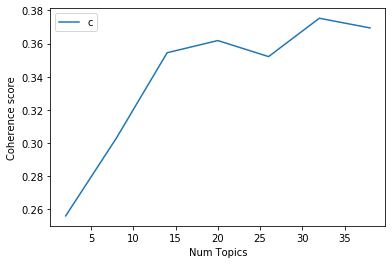

In [71]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [76]:
print(type(texts))

<class 'list'>


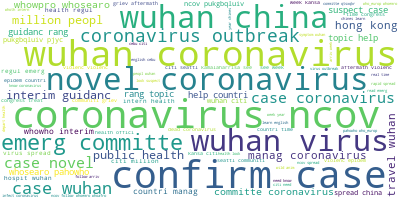

In [80]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
for text in nbtqdm(texts):
    for word in text:
        long_string = long_string + ',' + word
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
wordcloud.to_file("img/wordcloud.png")